In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movierating/Movie dataset.csv


# Step 1: Data Cleaning

This code loads the **CSV**, removes rows with missing **Rating**, cleans **Year** and **Duration**, converts **Votes** to numeric, and imputes missing values.

In [3]:
# Load the dataset
df = pd.read_csv("/kaggle/input/movierating/Movie dataset.csv", encoding='latin1')

# Check the data
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
# 1. Remove rows where 'Rating' is missing (since it's the target variable)
df = df.dropna(subset=['Rating'])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [5]:
# 2. Clean 'Year' column: Remove parentheses and convert to numeric
df['Year'] = df['Year'].str.strip('()').astype(int)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [6]:
# 3. Clean 'Duration' column: Remove ' min' suffix and convert to numeric
df['Duration'] = df['Duration'].str.replace(' min', '').str.strip()
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
# Impute missing 'Duration' with the mean
duration_mean = df['Duration'].mean()
df['Duration'] = df['Duration'].fillna(duration_mean)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [7]:
# 4. Clean 'Votes' column: Convert to numeric, handle missing values with median
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
votes_median = df['Votes'].median()
df['Votes'] = df['Votes'].fillna(votes_median)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,35.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [13]:
# 5. Handle missing values in 'Director', 'Actor 1', 'Actor 2', 'Actor 3'
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col] = df[col].fillna('Unknown')

# 6. Handle missing 'Name' and 'Genre'
df = df.dropna(subset=['Name'])  # Drop rows with missing 'Name'
df['Genre'] = df['Genre'].fillna('Unknown')  # Impute 'Genre' with 'Unknown'

In [14]:
# 7. Final check and save cleaned dataset
print("Cleaned Data Overview:")
print(df.head())
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())
df.to_csv("/kaggle/working/cleaned_movie_dataset.csv", index=False)

Cleaned Data Overview:
                                 Name  Year  Duration  \
1  #Gadhvi (He thought he was Gandhi)  2019     109.0   
3                             #Yaaram  2019     110.0   
5                ...Aur Pyaar Ho Gaya  1997     147.0   
6                           ...Yahaan  2005     142.0   
8                  ?: A Question Mark  2012      82.0   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0    8.0   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4   35.0      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7  827.0    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4   35.0  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6  326.0   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai B


# Step 2: Exploratory Data Analysis (EDA)


**This code generates summary statistics, visualizes the distribution of ratings, and explores average ratings by genre.**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("/kaggle/working/cleaned_movie_dataset.csv")

In [16]:
# 1. Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
              Year    Duration       Rating        Votes
count  7919.000000  7919.00000  7919.000000  7919.000000
mean   1993.321758   132.29448     5.841621   105.978280
std      20.463770    22.82601     1.381777   179.560981
min    1917.000000    21.00000     1.100000     5.000000
25%    1979.500000   124.00000     4.900000    16.000000
50%    1997.000000   132.29448     6.000000    35.000000
75%    2011.000000   143.00000     6.800000    89.000000
max    2021.000000   321.00000    10.000000   999.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


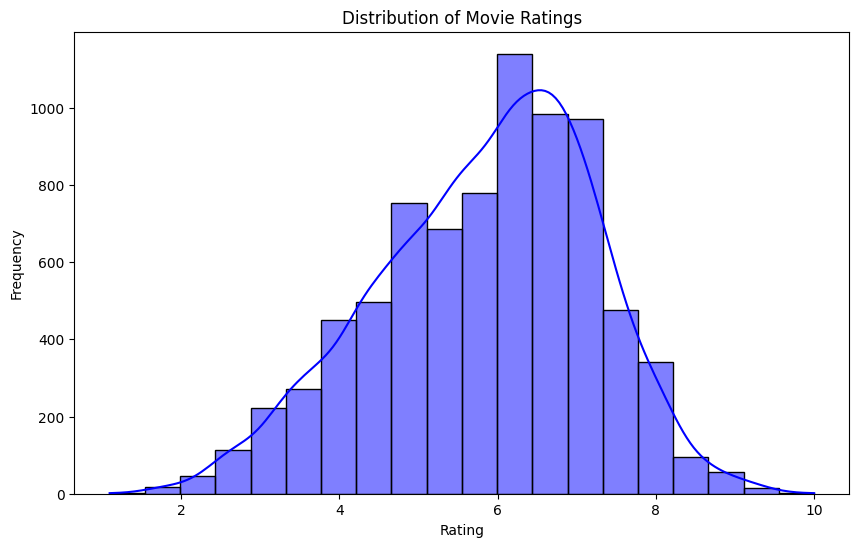

In [17]:
# 2. Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

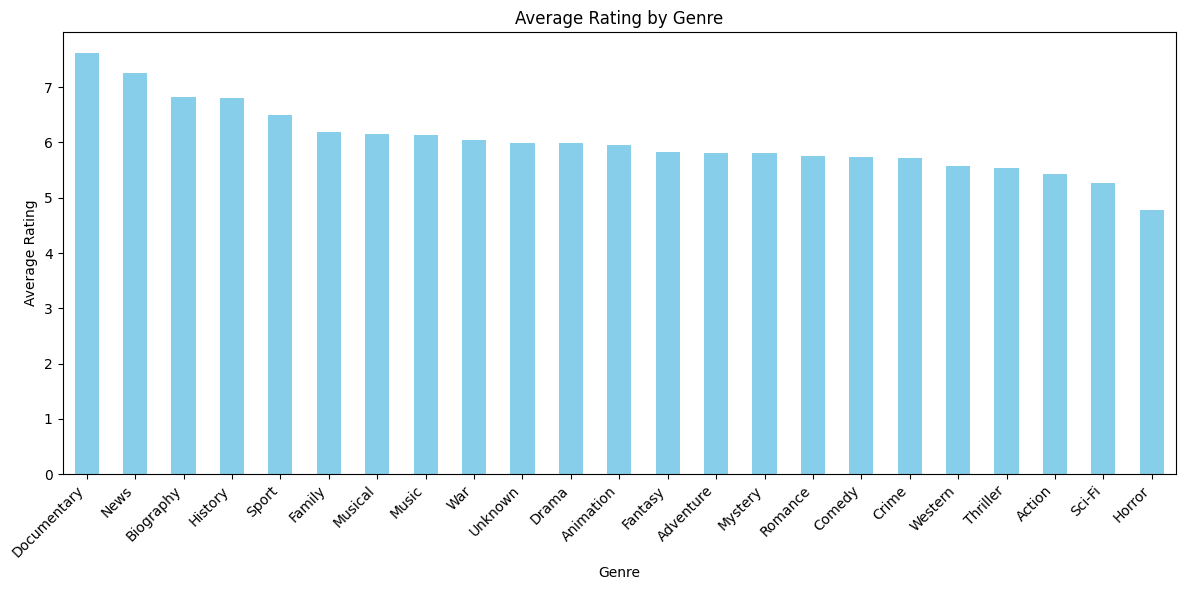

In [18]:

# 3. Average Rating by Genre
# Split multi-genre entries and explode into separate rows
df_genre = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
genre_ratings = df_genre.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

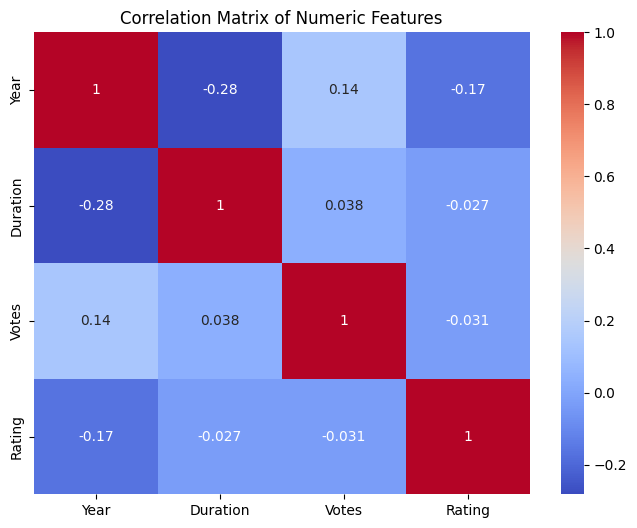

In [19]:
# 4. Correlation between numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Year', 'Duration', 'Votes', 'Rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [20]:

# 5. Top Directors by Average Rating (minimum 5 movies)
director_ratings = df.groupby('Director')['Rating'].agg(['mean', 'count'])
director_ratings = director_ratings[director_ratings['count'] >= 5].sort_values('mean', ascending=False)
print("Top 10 Directors by Average Rating (min 5 movies):")
print(director_ratings.head(10))

Top 10 Directors by Average Rating (min 5 movies):
                       mean  count
Director                          
Anand Patwardhan   8.287500      8
Rajkumar Hirani    8.060000      5
Gulzar             7.521053     19
Shoojit Sircar     7.500000      7
Guru Dutt          7.487500      8
Kidar Nath Sharma  7.466667      9
Neeraj Pandey      7.460000      5
Anurag Kashyap     7.385714     14
Dibakar Banerjee   7.383333      6
Nishikant Kamat    7.360000      5


# Step 3: Feature Engineering
**This code transforms the data into features suitable for modeling, including one-hot encoding for genres and target encoding for directors and actors.**

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
df = pd.read_csv("/kaggle/working/cleaned_movie_dataset.csv")

In [22]:
# 1. One-Hot Encoding for 'Genre'
# Split genres and create binary columns
df_genre = df['Genre'].str.split(', ', expand=True).stack()
df_genre = pd.get_dummies(df_genre, prefix='Genre').groupby(level=0).sum()
df = df.join(df_genre)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,Genre_Musical,Genre_Mystery,Genre_News,Genre_Romance,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_Unknown,Genre_War,Genre_Western
0,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,...,0,0,0,0,0,0,0,0,0,0
1,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,...,0,0,0,1,0,0,0,0,0,0
2,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,...,1,0,0,0,0,0,0,0,0,0
3,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,35.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,...,0,0,0,1,0,0,0,0,1,0
4,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,...,0,1,0,0,0,0,1,0,0,0


In [23]:

# 2. Target Encoding for 'Director' and Actors
# Calculate mean rating for each director and actor
for col in ['Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    mean_rating = df.groupby(col)['Rating'].mean()
    df[f'{col}_Avg_Rating'] = df[col].map(mean_rating)

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,Genre_Sci-Fi,Genre_Sport,Genre_Thriller,Genre_Unknown,Genre_War,Genre_Western,Director_Avg_Rating,Actor 1_Avg_Rating,Actor 2_Avg_Rating,Actor 3_Avg_Rating
0,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,...,0,0,0,0,0,0,7.000000,6.850000,7.000000,7.000000
1,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,...,0,0,0,0,0,0,4.400000,5.420000,4.400000,4.450000
2,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,...,0,0,0,0,0,0,5.358824,4.788889,5.786667,5.846154
3,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,35.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,...,0,0,0,0,1,0,7.500000,5.356000,6.050000,6.500000
4,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,...,0,0,1,0,0,0,5.600000,5.600000,5.883333,5.600000


In [24]:
# 3. Derived Features
# Number of genres per movie
df['Num_Genres'] = df['Genre'].str.split(', ').apply(len)
# Bin 'Year' into decades
df['Decade'] = pd.cut(df['Year'], bins=range(1930, 2030, 10), labels=[f"{i}s" for i in range(1930, 2020, 10)])

df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,...,Genre_Thriller,Genre_Unknown,Genre_War,Genre_Western,Director_Avg_Rating,Actor 1_Avg_Rating,Actor 2_Avg_Rating,Actor 3_Avg_Rating,Num_Genres,Decade
0,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,...,0,0,0,0,7.000000,6.850000,7.000000,7.000000,1,2010s
1,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,...,0,0,0,0,4.400000,5.420000,4.400000,4.450000,2,2010s
2,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,...,0,0,0,0,5.358824,4.788889,5.786667,5.846154,3,1990s
3,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,35.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,...,0,0,1,0,7.500000,5.356000,6.050000,6.500000,3,2000s
4,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,...,1,0,0,0,5.600000,5.600000,5.883333,5.600000,3,2010s


In [ ]:
# 4. Scale Numeric Features
numeric_cols = ['Year', 'Duration', 'Votes', 'Director_Avg_Rating', 'Actor 1_Avg_Rating', 
                'Actor 2_Avg_Rating', 'Actor 3_Avg_Rating', 'Num_Genres']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

In [25]:
# 5. Drop original categorical columns and handle 'Decade' for modeling
df = df.drop(columns=['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
df = pd.get_dummies(df, columns=['Decade'], drop_first=True)
df.head()

,Year,Duration,Rating,Votes,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Actor 3_Avg_Rating,Num_Genres,Decade_1940s,Decade_1950s,Decade_1960s,Decade_1970s,Decade_1980s,Decade_1990s,Decade_2000s,Decade_2010s
0,2019,109.0,7.0,8.0,0,0,0,0,0,0,...,7.000000,1,False,False,False,False,False,False,False,True
1,2019,110.0,4.4,35.0,0,0,0,0,1,0,...,4.450000,2,False,False,False,False,False,False,False,True
2,1997,147.0,4.7,827.0,0,0,0,0,1,0,...,5.846154,3,False,False,False,False,False,True,False,False
3,2005,142.0,7.4,35.0,0,0,0,0,0,0,...,6.500000,3,False,False,False,False,False,False,True,False
4,2012,82.0,5.6,326.0,0,0,0,0,0,0,...,5.600000,3,False,False,False,False,False,False,False,True


In [27]:

# 6. Save the processed dataset
print("Feature-Engineered Data Overview:")
print(df.head())
df.to_csv("/kaggle/working/processed_movie_dataset.csv", index=False)

Feature-Engineered Data Overview:
   Year  Duration  Rating  Votes  Genre_Action  Genre_Adventure  \
0  2019     109.0     7.0    8.0             0                0   
1  2019     110.0     4.4   35.0             0                0   
2  1997     147.0     4.7  827.0             0                0   
3  2005     142.0     7.4   35.0             0                0   
4  2012      82.0     5.6  326.0             0                0   

   Genre_Animation  Genre_Biography  Genre_Comedy  Genre_Crime  ...  \
0                0                0             0            0  ...   
1                0                0             1            0  ...   
2                0                0             1            0  ...   
3                0                0             0            0  ...   
4                0                0             0            0  ...   

   Actor 3_Avg_Rating  Num_Genres  Decade_1940s  Decade_1950s  Decade_1960s  \
0            7.000000           1         False         F

# Step 4: Model Building
**This code splits the data, trains a Random Forest Regressor, evaluates it, and provides feature importance.**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the processed dataset
df = pd.read_csv("processed_movie_dataset.csv")

In [29]:
# 1. Split Features and Target
X = df.drop(columns=['Rating'])
y = df['Rating']

In [31]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# 3. Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# 4. Make Predictions
y_pred = model.predict(X_test)

In [34]:
# 5. Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:
Mean Absolute Error (MAE): 0.42
Root Mean Squared Error (RMSE): 0.63
R² Score: 0.79


In [35]:
# 6. Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("\nTop 10 Feature Importance:")
print(feature_importance.head(10))


Top 10 Feature Importance:
Director_Avg_Rating    0.613163
Actor 3_Avg_Rating     0.105688
Actor 2_Avg_Rating     0.095638
Actor 1_Avg_Rating     0.077755
Votes                  0.028824
Duration               0.020750
Year                   0.019425
Num_Genres             0.004064
Genre_Action           0.003127
Genre_Romance          0.002701
dtype: float64


In [36]:
# 7. Save Predictions
results = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': y_pred})
results.to_csv("/kaggle/working/movie_rating_predictions.csv", index=False)

In [37]:
# Load the actual vs. predicted ratings dataset
df = pd.read_csv("/kaggle/working/movie_rating_predictions.csv")
df.head()

,Actual Rating,Predicted Rating
0,3.3,3.314
1,5.3,5.034
2,5.7,4.731
3,7.2,6.506
4,3.5,3.506
